# Описание проекта

Оценить корректность проведения A/B-теста и проанализировать его результаты.

**Чтобы оценить корректность проведения теста:**
- удостовериться, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно;
- проверить равномерность распределения пользователей по тестовым группам и правильность их формирования.

**Ход исследования:**

**1) Предобработка данных:**
  - Проверить требуется ли преобразование типов данных
  - Описать природу пропущенных значений и дубликатов, если они обнаружатся

**2) Оценить корректность проведения теста. Обратить внимание на:**  
  - Соответствие данных требованиям технического задания. Проверить корректность всех пунктов технического задания
  - Время проведения теста. Убедиться, что оно не совпадает с маркетинговыми и другими активностями
  - Аудиторию теста. Удостовериться, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно. Проверить равномерность распределения по тестовым группам и правильность их формирования.
  
**3) Провести исследовательский анализ данных:** 
  - Количество событий на пользователя одинаково распределены в выборках?
  - Как число событий в выборках распределено по дням?
  - Как меняется конверсия в воронке в выборках на разных этапах?
  - Какие особенности данных нужно учесть, прежде чем приступать к A/Bтестированию?

**4) Оценить результаты A/B-тестирования:**
  - Что можно сказать про результаты A/В-тестирования?
  - Проверьте статистическую разницу долей z-критерием.

**5) Описать выводы по этапу исследовательского анализа данных и попроведённой оценке результатов A/B-тестирования. Сделать общее заключение о корректности проведения теста.**


# Подключение библиотек и загрузка данных

Подключим библиотеки, которые нужны для исследования

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth
import plotly.express as px
from plotly import graph_objects as go
import random
import warnings

**1) Загрузим датасет `final_ab_events.csv`, в котором содержатся действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.**

In [50]:
events = pd.read_csv('final_ab_events.csv')
display(events.head())
events.info()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


**2) Загрузим датасет `ab_project_marketing_events.csv`, в котором содержится календарь маркетинговых событий на 2020 год.**

In [51]:
marketing_events = pd.read_csv('ab_project_marketing_events.csv')
display(marketing_events.head())
marketing_events.info()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


**3) Загрузим датасет `final_ab_new_users.csv`, в котором содержатся пользователи, зарегистрировавшиеся с 7 до 21 декабря 2020 года**

In [52]:
new_users = pd.read_csv('final_ab_new_users.csv')
display(new_users.head())
new_users.info()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


**4) Загрузим датасет `final_ab_participants.csv`, в котором содержитсятаблица участников тестов**

In [53]:
participants = pd.read_csv('final_ab_participants.csv')
display(participants.head())
participants.info()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


**Вывод**

Проблемы с данными, которые стоит рассмотреть:
   
    1) Поменять тип данных в столбце `event_dt` таблицы events
  
    2) Исследовать пропущенные значения в столбце `details` таблицы events
  
    3) Поменять тип данных в столбцах `start_dt` и `finish_dt` таблицы marketing_events
  
    4) Поменять тип данных в столбце `first_date` таблицы new_users
    
    5) Проверить дубликаты в каждой из 4 таблиц
  
Больше проблем с данными нет, перейдем к предобработке данных  

# Предобработка данных

**Поменяем тип данных в столбце `event_dt` и проверим на дубликаты в таблице events, также исследуем пропущенные значения в столбце `details`**

In [54]:
events['event_dt'] = pd.to_datetime(events['event_dt'])
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


In [55]:
events.duplicated().sum()

0

In [56]:
events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

Тип данных в столбце поменяли, дубликатов явных и неявных данная таблица не имеет

In [57]:
events.groupby('event_name')['details'].apply(lambda x: x.isna().sum())

event_name
login           189552
product_cart     62462
product_page    125563
purchase             0
Name: details, dtype: int64

In [58]:
events.query("details == details and event_name != 'purchase'").count()

user_id       0
event_dt      0
event_name    0
details       0
dtype: int64

Пропуски здесь обоснованные, при любом другом типе события кроме purchase, нет дополнительных данных о событии, поэтому трогать их точно не нужно

**Поменяем тип данных в столбцах `start_dt` и `finish_dt` таблицы marketing_events и посмотрим дубликаты**

In [59]:
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [60]:
display(marketing_events)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Поменяли тип данных в столбцах, так как в данной таблице всего 14 строк, то видно, что явных и неявных дубликатов здесь нет

**Поменяем тип данных в столбце `first_date` таблицы new_users и посмотрим дубликаты**

In [61]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


In [62]:
new_users.duplicated().sum()

0

In [63]:
new_users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

In [64]:
new_users['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

Тип данных заменили, явных и неявных дубликатов в данной таблице нет

**Рассмотрим таблицу participants**

С типами данных в столбцах все нормально. Посмотрим дубликаты

In [65]:
participants.duplicated().sum()

0

In [66]:
participants['group'].unique()

array(['A', 'B'], dtype=object)

In [67]:
participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

Здесь никаких проблем нет, переходим к оценке корректности проведения теста

# Оценка корректности проведения теста

### Соответствие данных требованиям технического задания. Проверить корректность всех пунктов технического задания

**Так как по ТЗ нам нужны только пользователи, которые участвуют в `recommender_system_test`, сделаем срез и также проверим на пересечение данных пользователей с другим тестом.**

In [68]:
our_test = participants.query("ab_test == 'recommender_system_test'")
display(our_test)
other_test = participants.query("ab_test == 'interface_eu_test'")
display(our_test.merge(other_test, on = 'user_id'))

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
6696,053FB26D6D49EDDC,A,recommender_system_test
6697,9D263B8EF15CF188,B,recommender_system_test
6698,F2FBBA33F37DEC46,A,recommender_system_test
6699,29C92313A98B1176,B,recommender_system_test


,user_id,group_x,ab_test_x,group_y,ab_test_y
0,DABC14FDDFADD29E,A,recommender_system_test,A,interface_eu_test
1,04988C5DF189632E,A,recommender_system_test,A,interface_eu_test
2,B3A2485649E4A012,A,recommender_system_test,A,interface_eu_test
3,EAFB9027A27D510C,B,recommender_system_test,A,interface_eu_test
4,5D5E6EE92AF6E9E0,B,recommender_system_test,B,interface_eu_test
...,...,...,...,...,...
1597,C2DC7B6881CE6E30,B,recommender_system_test,B,interface_eu_test
1598,EA29547AB3C0CB9C,B,recommender_system_test,A,interface_eu_test
1599,9A44E27079666291,B,recommender_system_test,A,interface_eu_test
1600,FA86D8DFAD3ADADE,A,recommender_system_test,A,interface_eu_test


Получается у нас есть 1602 пользователя, которые участвовали в обоих тестах. Для чистоты нашего теста, удалим их.

In [69]:
mask = our_test['user_id'].isin(other_test['user_id'])
our_test_filtered = our_test[~mask]
our_test_filtered.reset_index(inplace= True)
display(our_test_filtered)

,index,user_id,group,ab_test
0,0,D1ABA3E2887B6A73,A,recommender_system_test
1,1,A7A3664BD6242119,A,recommender_system_test
2,4,482F14783456D21B,B,recommender_system_test
3,5,4FF2998A348C484F,A,recommender_system_test
4,6,7473E0943673C09E,A,recommender_system_test
...,...,...,...,...
5094,6696,053FB26D6D49EDDC,A,recommender_system_test
5095,6697,9D263B8EF15CF188,B,recommender_system_test
5096,6698,F2FBBA33F37DEC46,A,recommender_system_test
5097,6699,29C92313A98B1176,B,recommender_system_test


Готово

**Так как по ТЗ нам нужны только пользователи, которые проживают в регионе EU, отберем их.**

In [70]:
users_eu = new_users.query("region == 'EU'")
display(users_eu)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
9,FFCEA1179C253104,2020-12-07,EU,Android
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


Теперь отберем здесь пользователей, которые участвовали в тесте

In [71]:
mask = users_eu['user_id'].isin(our_test_filtered['user_id'])
users_eu_new = users_eu[mask]
display(users_eu_new)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
23,831887FE7F2D6CBA,2020-12-07,EU,Android
39,4CB179C7F847320B,2020-12-07,EU,iPhone
65,16C69ED14DA9F4A8,2020-12-07,EU,PC
69,3C5DD0288AC4FE23,2020-12-07,EU,PC
...,...,...,...,...
61681,3CA972F86411CF13,2020-12-20,EU,PC
61693,0F7D49FC184EDCDE,2020-12-20,EU,PC
61709,574ACBC674BC385D,2020-12-20,EU,Mac
61710,0416B34D35C8C8B8,2020-12-20,EU,Android


Таким образом мы получили еще меньшее количество человек. Это связано с тем, что не все люди, отобранные на тест, были из Европы.

**Разберемся с датами. По условиям ТЗ у нас должно быть вот так:**
- дата запуска: 2020-12-07
- дата остановки набора новых пользователей: 2020-12-21
- дата остановки: 2021-01-04

Проверим минимальную и максимальную дату регистрации, которая есть в уже отобранных пользователях

In [72]:
display(users_eu_new['first_date'].min())
display(users_eu_new['first_date'].max())

Timestamp('2020-12-07 00:00:00')

Timestamp('2020-12-21 00:00:00')

Здесь все условия ТЗ выполнены, но нужно посмотреть на действия, которые делали пользователи. Только для начала срежем таблицу events под участников теста.

In [73]:
mask = events['user_id'].isin(users_eu_new['user_id'])
events_new = events[mask]
display(events_new)
display(events_new['event_dt'].min())
display(events_new['event_dt'].max())

,user_id,event_dt,event_name,details
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99
58,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99
74,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99
118,A9908F62C41613A8,2020-12-07 11:26:47,purchase,9.99
...,...,...,...,...
440200,930EACAE048DFF45,2020-12-29 06:56:00,login,NaN
440236,E5589EAE02ACD150,2020-12-29 22:17:08,login,NaN
440239,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,NaN
440267,553BAE96C6EB6240,2020-12-29 14:09:14,login,NaN


Timestamp('2020-12-07 00:16:00')

Timestamp('2020-12-30 06:42:52')

Как мы видим, последнее совершенное действие были сделано 30 декабря, но остановка набора новых пользователей завершилась только 21 декабря. По условиям нашего теста лайфтайм равен 14 дней. То есть некоторые пользователи не проведут все эти 14 дней, а значит результаты теста исказятся. В данном случае хорошим решением будет передвинуть дату остановки набора новых пользователей на 17 декабря.

In [74]:
users_eu_new = users_eu_new.query("first_date <= '2020-12-17'")
display(users_eu_new)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
23,831887FE7F2D6CBA,2020-12-07,EU,Android
39,4CB179C7F847320B,2020-12-07,EU,iPhone
65,16C69ED14DA9F4A8,2020-12-07,EU,PC
69,3C5DD0288AC4FE23,2020-12-07,EU,PC
...,...,...,...,...
57403,F5A2E09EDD13F4EE,2020-12-13,EU,iPhone
57416,CB194C10D84C7E25,2020-12-13,EU,PC
57433,AD21E668FC949228,2020-12-13,EU,Mac
57441,1FCFF602844AD352,2020-12-13,EU,Android


Теперь мы можем соединить все таблицы в одну, чтобы было удобно работать дальше

In [75]:
df = users_eu_new.merge(our_test_filtered, how = 'left' , on = 'user_id')
display(df)

,user_id,first_date,region,device,index,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,6226,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-07,EU,Android,656,A,recommender_system_test
2,4CB179C7F847320B,2020-12-07,EU,iPhone,2789,B,recommender_system_test
3,16C69ED14DA9F4A8,2020-12-07,EU,PC,2036,B,recommender_system_test
4,3C5DD0288AC4FE23,2020-12-07,EU,PC,3943,A,recommender_system_test
...,...,...,...,...,...,...,...
3280,F5A2E09EDD13F4EE,2020-12-13,EU,iPhone,3796,B,recommender_system_test
3281,CB194C10D84C7E25,2020-12-13,EU,PC,5954,A,recommender_system_test
3282,AD21E668FC949228,2020-12-13,EU,Mac,606,A,recommender_system_test
3283,1FCFF602844AD352,2020-12-13,EU,Android,5095,A,recommender_system_test


In [76]:
data = events_new.merge(df, on = 'user_id')
display(data)

,user_id,event_dt,event_name,details,first_date,region,device,index,group,ab_test
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,656,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android,656,A,recommender_system_test
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,2020-12-07,EU,Android,656,A,recommender_system_test
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,2020-12-07,EU,Android,656,A,recommender_system_test
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,2020-12-07,EU,Android,656,A,recommender_system_test
...,...,...,...,...,...,...,...,...,...,...
10977,E26F13A65CEAC6EA,2020-12-17 08:45:52,login,NaN,2020-12-17,EU,Mac,6348,A,recommender_system_test
10978,E26F13A65CEAC6EA,2020-12-19 23:30:22,login,NaN,2020-12-17,EU,Mac,6348,A,recommender_system_test
10979,E26F13A65CEAC6EA,2020-12-20 18:41:25,login,NaN,2020-12-17,EU,Mac,6348,A,recommender_system_test
10980,8013F2257A25F9BD,2020-12-17 02:09:03,login,NaN,2020-12-17,EU,iPhone,6330,A,recommender_system_test


In [77]:
print(data['user_id'].nunique())

1591


**Влияние маркетинговых событий**

In [78]:
display(marketing_events.sort_values('start_dt'))

,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


Как мы видим, по датам с нашим тестом совпадает два маркетинговых событий: `Christmas&New Year Promo` и `CIS New Year Gift Lottery`. Но так как мы знаем распределение событий по дням, то `Christmas&New Year Promo`, которое затрагивает тест с 25 декабря по 30 декабря никак не влияет на тест, так как никаких всплесков или просадки по событиям в эти дни нет. `CIS New Year Gift Lottery` затрагивает только 30 декабря, но в этот день вообще почти не было событий, поэтому получаем, что маркетинговые события никак не влияют на наш тест.

**Проверка на корректность 15% EU**

Посчитаем количество пользователей, которые зарегистрировались с 7 по 21 декабря

In [79]:
new_users.query("first_date >= '2020-12-07' and first_date <= '2020-12-21'")['user_id'].nunique()

56470

Выведем процент пользователей которые попали в наш тест

In [80]:
print(df['user_id'].nunique()/new_users.query("first_date >= '2020-12-07' and first_date <= '2020-12-21'  and region =='EU' ")['user_id'].nunique()*100)

7.758620689655173


Получаем, что тест набрал всего 5,8% пользователей из Евросоюза из 15% заявленных, значит, данный пункт ТЗ не выполнен.


### Удостоверимся, что группы в тесте составлены правильно и не имеют пересечений

При A/B тесте распределение между группа должно быть 50/50. Проверим как в нашем случае распределяются пользователи

In [81]:
print(df['group'].value_counts())

A    1889
B    1396
Name: group, dtype: int64


Как мы видим, участники теста распределены между группами совсем неодинаково, но собственно, сделать мы ничего не можем, поэтому будем работать дальше с таким распределением

In [82]:
df.groupby('user_id').agg({'group' : 'nunique'}).query('group>1').count()

group    0
dtype: int64

Как можно увидеть группы в тесте не пересекаются

### Вывод

Таким образом сделали следующее:

1) Убрали пересечение с другим тестом, чтобы не получить плохие результаты теста

2) Сократили пользователей за счет выделения только Европейского региона

3) Уменьшили дату остановки набора новых пользователей до 17 декабря, чтобы все пользователи помещались в лайфтайм

4) Число участников теста составляет 3285

5) Те кто совершал какие-либо действия: 1591

6) `Christmas&New Year Promo`, которое затрагивает тест с 25 декабря по 30 декабря никак не влияет на тест, так как никаких всплесков или просадки по событиям в эти дни нет. `CIS New Year Gift Lottery` затрагивает только 30 декабря, но в этот день вообще почти не было событий, поэтому получаем, что маркетинговые события никак не влияют на наш тест.

7) Тест набрал всего 5,8% пользователей из Евросоюза из 15% заявленных, значит, данный пункт ТЗ не выполнен.

8) Распределение между группами не равное(А - 1889, В - 1396), но пересечений в группах теста не имеется

Тем самым мы получили не самые лучшие качества данных для нашего теста, потому что какая-то часть не выполнена, от распределения групп до количества участников теста.

# Исследовательский анализ данных

### Распределение количества событий на пользователя по группам

In [83]:
event_user1 = data.groupby(['user_id', 'group'])['event_name'].agg('count').reset_index()
display(event_user1)

,user_id,group,event_name
0,0010A1C096941592,A,12
1,003DF44D7589BBD4,A,15
2,00505E15A9D81546,A,5
3,006E3E4E232CE760,A,6
4,015CCC27BDB640E1,A,6
...,...,...,...
1586,FF120D67C4BE2DA3,A,6
1587,FF1AB7A774128512,A,4
1588,FF40F25452E70E3D,A,4
1589,FF4456FBA59116E3,A,12


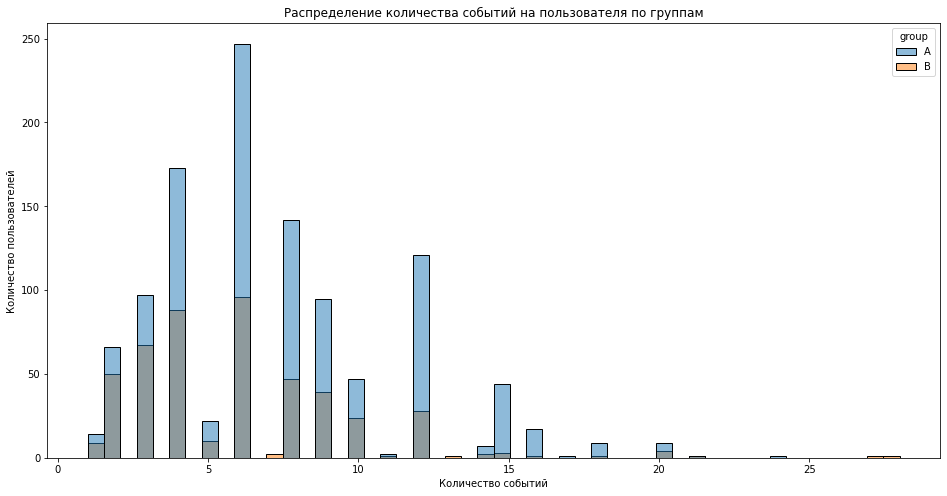

In [84]:
plt.figure(figsize=(16,8))
ax = sns.histplot(data=event_user1, bins = 50,x = 'event_name' , hue='group')
ax.set (xlabel='Количество событий',
 ylabel='Количество пользователей',
 title='Распределение количества событий на пользователя по группам')
plt.show()

Как можно увидеть, что для группы А, что для группы В, пик приходится на 6 событий. Больше 25 событий делали только в группе В. Распределение в обоих группах напоминает нормальное со скосом влево, правда, есть провал на 5 событиях. Это связано с четностью событий от логина до покупки

In [85]:
df_main = data
df_main['event_date'] = df_main['event_dt'].dt.date
#Срез для А
df_main_a = df_main.query('group == "A"')
df_main_a

,user_id,event_dt,event_name,details,first_date,region,device,index,group,ab_test,event_date
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-07
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-09
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-07
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-08
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...
10977,E26F13A65CEAC6EA,2020-12-17 08:45:52,login,NaN,2020-12-17,EU,Mac,6348,A,recommender_system_test,2020-12-17
10978,E26F13A65CEAC6EA,2020-12-19 23:30:22,login,NaN,2020-12-17,EU,Mac,6348,A,recommender_system_test,2020-12-19
10979,E26F13A65CEAC6EA,2020-12-20 18:41:25,login,NaN,2020-12-17,EU,Mac,6348,A,recommender_system_test,2020-12-20
10980,8013F2257A25F9BD,2020-12-17 02:09:03,login,NaN,2020-12-17,EU,iPhone,6330,A,recommender_system_test,2020-12-17


user_id
0010A1C096941592    12
003DF44D7589BBD4    15
00505E15A9D81546     5
006E3E4E232CE760     6
015CCC27BDB640E1     6
                    ..
FF120D67C4BE2DA3     6
FF1AB7A774128512     4
FF40F25452E70E3D     4
FF4456FBA59116E3    12
FFAE9489C76F352B     6
Name: event_name, Length: 1115, dtype: int64

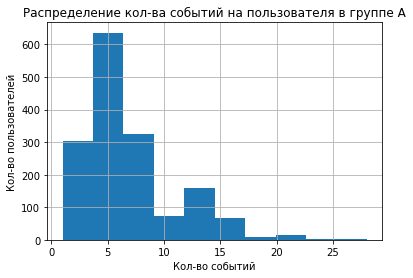

In [86]:
count_events_a = df_main_a.groupby('user_id')['event_name'].count()
display(count_events_a)
event_user1.hist(bins = 10)
plt.xlabel('Кол-во событий')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение кол-ва событий на пользователя в группе А')

plt.show()

### Распределение числа событий по дням

Чтобы построить гистограмму, нам нужно достать дату из `event_dt` без времени

In [87]:
data['event_date'] = data['event_dt'].dt.date
display(data.head(10))

,user_id,event_dt,event_name,details,first_date,region,device,index,group,ab_test,event_date
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-07
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-09
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-07
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-08
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-09
5,831887FE7F2D6CBA,2020-12-07 06:50:29,login,NaN,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-07
6,831887FE7F2D6CBA,2020-12-08 10:52:26,login,NaN,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-08
7,831887FE7F2D6CBA,2020-12-09 02:19:17,login,NaN,2020-12-07,EU,Android,656,A,recommender_system_test,2020-12-09
8,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,2020-12-07,EU,PC,3943,A,recommender_system_test,2020-12-07
9,3C5DD0288AC4FE23,2020-12-07 19:42:40,product_page,NaN,2020-12-07,EU,PC,3943,A,recommender_system_test,2020-12-07


Теперь сгруппируем по новому столбцу и посчитаем количество событий, а затем построим гистограму

In [88]:
event_day = data[['user_id', 'event_name', 'group', 'event_date']]
event_day = event_day.groupby(['event_date', 'group'])['event_name'].agg('count').reset_index()
display(event_day.head(10))

,event_date,group,event_name
0,2020-12-07,A,221
1,2020-12-07,B,268
2,2020-12-08,A,239
3,2020-12-08,B,169
4,2020-12-09,A,282
5,2020-12-09,B,250
6,2020-12-10,A,246
7,2020-12-10,B,182
8,2020-12-11,A,264
9,2020-12-11,B,115


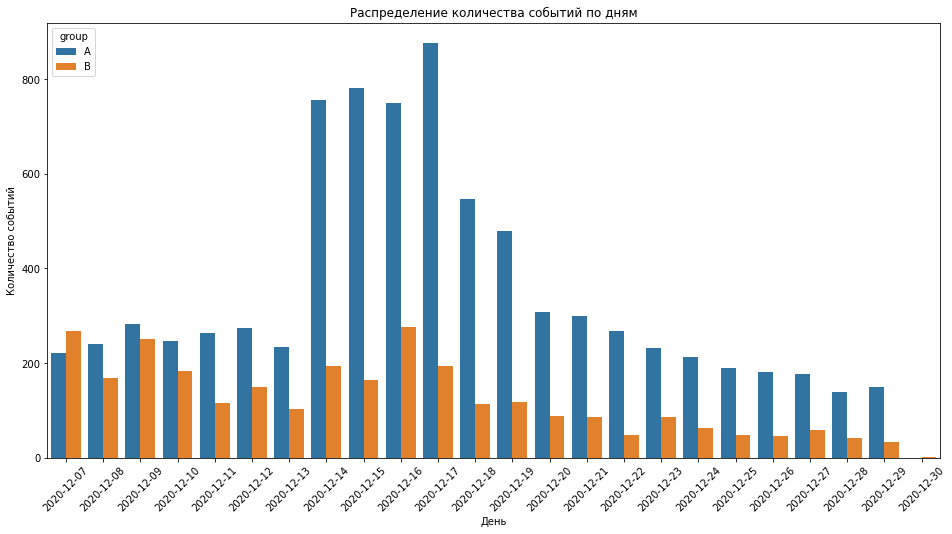

In [89]:
plt.figure(figsize=(16,8))
ax = sns.barplot(data=event_day, x="event_date", y = "event_name", hue = 'group')
ax.set (xlabel='День',
 ylabel='Количество событий',
 title='Распределение количества событий по дням')
plt.xticks(rotation=45)
plt.show()

Единственный день, когда группа В лидировала по количеству событий - это начало теста 7 декабря. Пики количество событий приходятся на 13-19 декабря и затем идет на спад. 30 декабря действия на сайте производила только группа В.

### Изменение конверсии в воронке в выборках на разных этапах


Сделаем срез, сгруппировав пользователей по группе и названию события, и посчитаем пользователей

In [90]:
cr = data.groupby(['group', 'event_name'])['user_id'].count().reset_index()
display(cr)

,group,event_name,user_id
0,A,login,3605
1,A,product_cart,1127
2,A,product_page,2327
3,A,purchase,1031
4,B,login,1394
5,B,product_cart,397
6,B,product_page,740
7,B,purchase,361


In [99]:
cr_a = cr.query("group == 'A'")
cr_a['Проценты'] = round((cr_a['user_id'] / cr_a['user_id'].iloc[0]) * 100, 2)
display(cr_a)   
cr_b = cr.query("group == 'B'")
cr_b['Проценты'] = round((cr_b['user_id'] / cr_b['user_id'].iloc[0]) * 100, 2)
display(cr_b)  
warnings.filterwarnings("ignore")

,group,event_name,user_id,Проценты
0,A,login,3605,100.00
1,A,product_cart,1127,31.26
2,A,product_page,2327,64.55
3,A,purchase,1031,28.60


,group,event_name,user_id,Проценты
4,B,login,1394,100.00
5,B,product_cart,397,28.48
6,B,product_page,740,53.08
7,B,purchase,361,25.90


Как мы можем увидеть из таблиц, конверсия просмотра корзин упала на 3%, конверсия просмотра карточек товара упала на 11%, конверсия покупки упала на 3%, хотя в ТЗ ожидаемый эффект: улучшение не менее чем на 10%

Построим интерактивную воронку, чтобы наглядно посмотреть на изменение конверсии среди групп

In [92]:
fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'Group A',
    y = ["login", "product_page" , "product_cart", "purchase"],
    x = [3605, 2327, 1127, 1031],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Group B',
    orientation = "h",
    y = ["login", "product_page", "product_cart", "purchase"],
    x = [1394, 740 ,397, 361],
    textposition = "inside",
    textinfo = "value+percent previous"))
fig.update_layout(
    title=dict(
        text='Воронка изменения конверсии среди групп',
        x=0.5,  # Середина по x-ось
        y=0.95,  # Верхняя часть по y-ось
        xanchor='center',
        yanchor='top'
    )
)
fig.show()

**Вывод**

1) Что для группы А, что для группы В, пик приходится на 6 событий. Больше 25 событий делали только в группе В. Распределение в обоих группах напоминает нормальное со скосом влево, правда, есть провал на 5 событиях. Это связано с четностью событий от логина до покупки.

2) Рассмотрели количество событий по дням. Пик выпадает на 14-19 декабря. В конце нашего теста действия на сайте совершались только группой B.

3) Изменения конверсии в воронке произошли в худшую сторону. Вместо улучшения на не менее чем 10%, конверсия просмотра корзин упала на 3%, конверсия просмотра карточек товара упала на 11%, конверсия покупки упала на 3%

# Оценка результатов A/B-тестирования

### Проверьте статистическую разницу долей z-критерием.

In [93]:
A = [cr_a.iloc[0]['user_id'], cr_a.iloc[1]['user_id'], cr_a.iloc[2]['user_id'], cr_a.iloc[3]['user_id']]
print(A)
B = [cr_b.iloc[0]['user_id'], cr_b.iloc[1]['user_id'], cr_b.iloc[2]['user_id'], cr_b.iloc[3]['user_id']]
print(B)

[3605, 1127, 2327, 1031]
[1394, 397, 740, 361]


Проверим разницу в изменении долей конверсий по каждому из событий. Начнем с просмотра корзин.

**H0: Нет оснований считать доли просмотра корзин разными**

**H1: Между долями просмотра корзин есть значимая разница**

In [94]:
alpha = .05 

successes = np.array([cr_a.iloc[1]['user_id'], cr_b.iloc[1]['user_id']])
trials = np.array([cr_a.iloc[0]['user_id'], cr_b.iloc[0]['user_id']])


p1 = successes[0]/trials[0]


p2 = successes[1]/trials[1]


p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])


difference = p1 - p2 

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))


distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.05527308027879374
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Получили, что нет оснований считать доли разными, даи конверсия упала всего на 3%

Проверим просмотр карточек товара

**H0: Нет оснований считать доли просмотра карточек товара разными**

**H1: Между долями просмотра карточек товара есть значимая разница**

In [95]:
alpha = .05 

successes = np.array([cr_a.iloc[2]['user_id'], cr_b.iloc[2]['user_id']])
trials = np.array([cr_a.iloc[0]['user_id'], cr_b.iloc[0]['user_id']])


p1 = successes[0]/trials[0]


p2 = successes[1]/trials[1]


p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])


difference = p1 - p2 

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))


distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  8.326672684688674e-14
Отвергаем нулевую гипотезу: между долями есть значимая разница


Здесь доля получилась значимая, это видно и по разнице в конверсии, которая выше 10%

Проверим покупки

**H0: Нет оснований считать доли покупок товара разными**

**H1: Между долями просмотра покупок есть значимая разница**

In [96]:
alpha = .05 

successes = np.array([cr_a.iloc[3]['user_id'], cr_b.iloc[3]['user_id']])
trials = np.array([cr_a.iloc[0]['user_id'], cr_b.iloc[0]['user_id']])


p1 = successes[0]/trials[0]


p2 = successes[1]/trials[1]


p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])


difference = p1 - p2 

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))


distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.05592956031293328
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Здесь нет оснований считать доли разными, и разница в конверсиях 3%

# Вывод

Была проведена **предобработка данных** в ходе которой:

- Поменяли тип данных в столбцах с временем
- Также проверили все 4 таблицы на явные и неявные дубликаты

Затем мы **проверили насколько наши данные соответсвуют техническому заданию:**

- Убрали пользователей, которые участвовали в обоих тестах
- Сделали срез только по европейскому региону
- Уменьшили дату остановки набора новых пользователей до 17 декабря, чтобы все пользователи помещались в лайфтайм
- Число участников теста составило 3285
- Те кто совершал какие-либо действия: 1591
- `Christmas&New Year Promo`, которое затрагивает тест с 25 декабря по 30 декабря никак не влияет на тест, так как никаких всплесков или просадки по событиям в эти дни нет. `CIS New Year Gift Lottery` затрагивает только 30 декабря, но в этот день вообще почти не было событий, поэтому получаем, что маркетинговые события никак не влияют на наш тест.
- Тест набрал всего 5,8% пользователей из Евросоюза из 15% заявленных, значит, данный пункт ТЗ не выполнен.
- Распределение между группами не равное(А - 1889, В - 1396), но пересечений в группах теста не имеется

Провели **исследовательский анализ данных** в котором:

- Что для группы А, что для группы В, пик приходится на 6 событий. Больше 25 событий делали только в группе В. Распределение в обоих группах напоминает нормальное со скосом влево, правда, есть провал на 5 событиях. Это связано с четностью событий от логина до покупки.
- Единственный день, когда группа В лидировала по количеству событий - это начало теста 7 декабря. Пики количество событий приходятся на 13-19 декабря и затем идет на спад. 30 декабря действия на сайте производила только группа В.
- Изменения конверсии в воронке произошли в худшую сторону. Вместо улучшения на не менее чем 10%, конверсия просмотра корзин упала на 3%, конверсия просмотра карточек товара упала на 11%, конверсия покупки упала на 3%

**Проверили статистическую разницу долей z-критерием**:

- Нет оснований считать доли просмотра корзин разными, да и конверсия упала всего на 3%
- Доля просмотров карточек товара получилась значимая, это видно и по разнице в конверсии, которая выше 10%
- Нет оснований считать доли покупок разными, и разница в конверсиях 3%

Тем самым мы можем сделать вывод о том, что условия проведения теста не были соблюдены, за счет чего не был получен ожидаемый результат, вместо повышения конверсии, она снизилась, хоть и в некоторых случаях незначительно. Поэтому собирать новые данные и запускать тест заново, так как этот тест ничем не поможет.